### Event study in Stocks prices

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import causalpy as cp
import seaborn as sns
plt.style.use('fivethirtyeight')


In [80]:
df = pd.read_excel('Stocks_prices.xlsx', parse_dates=True, index_col=0)

In [81]:
df.dropna(inplace=True)
df = df.pct_change().dropna()
df.sort_index(inplace=True)

In [82]:
df.head()

,SHOW3,MEEG,CINE1,AZUL
Pricing Date,,,,
2019-02-22,-0.003896,-0.142654,0.001870,-0.000817
2019-02-25,0.007853,0.024453,-0.013576,-0.007353
2019-02-26,0.032432,0.000261,0.007420,0.006966
2019-02-27,0.020690,0.011334,-0.006310,0.076248
2019-02-28,-0.006849,0.001154,-0.001832,0.016002


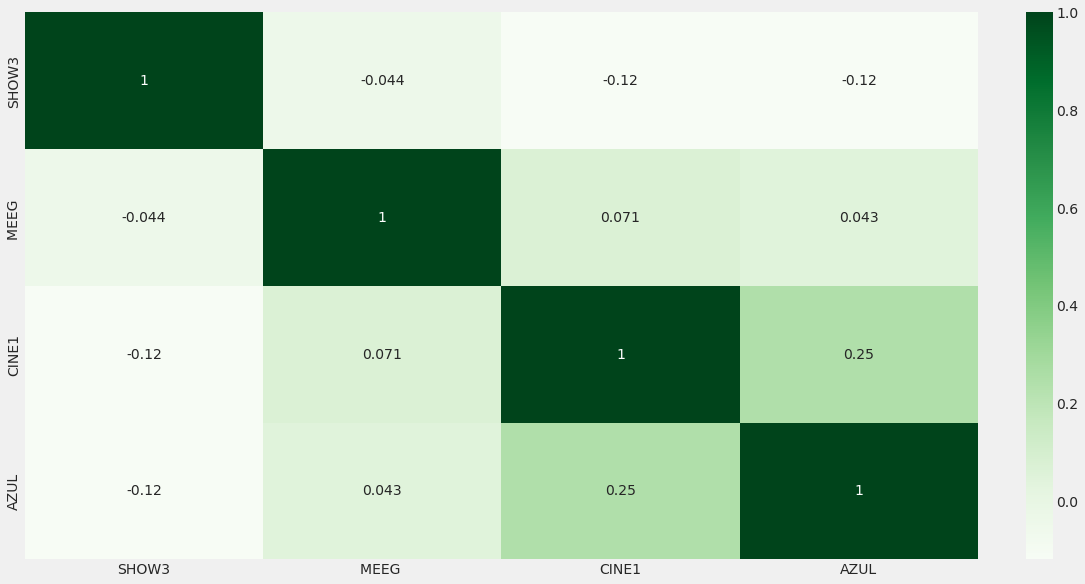

In [83]:
plt.figure(figsize=(15, 8))
grap = sns.heatmap(df.corr(), cmap='Greens', annot=True)

In [84]:
df = df.loc['2021-01-01':]

In [85]:
event = pd.to_datetime('2022-09-06')

In [86]:
model = cp.pymc_models.WeightedSumFitter()

In [87]:
formula = 'SHOW3 ~ 0 + CINE1 + AZUL + MEEG'

In [88]:
results = cp.pymc_experiments.SyntheticControl(
    df,
    event,
    formula=formula,
    model=model,
)

PatsyError: Error evaluating factor: NameError: name 'MEEG' is not defined
    SHOW3 ~ 0 + CINE1 + AZUL + MEEG
                               ^^^^

<Figure size 1080x576 with 0 Axes>

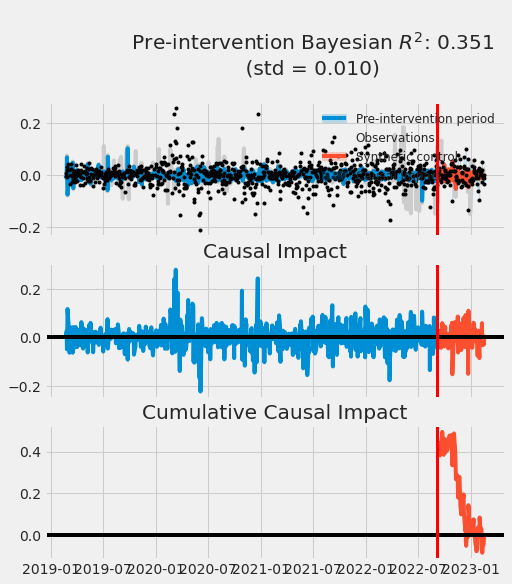

In [ ]:
plt.figure(figsize=(15, 8))
esults.plot(plot_predictors=True)
plt.show()